<a href="https://colab.research.google.com/github/outsider8946/machine-learning/blob/main/kaggle_titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [118]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: >

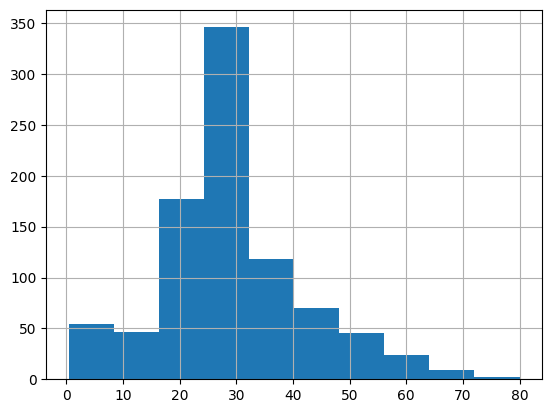

In [119]:
df = df.drop(['PassengerId','Name','Cabin'],axis=1)
df['Age'] = df['Age'].fillna(np.float64(int(df['Age'].mean())))
df['Age'].hist()

<Axes: >

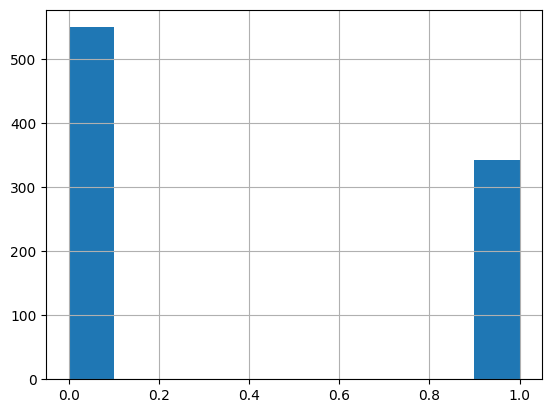

In [120]:
df['Survived'].hist()

In [102]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Ticket'] = le.fit_transform(df['Ticket'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [121]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,29.0,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [122]:
df.corr()

<ipython-input-122-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.067814,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.334974,0.083081,0.018443,-0.549500
Age,-0.067814,-0.334974,1.000000,-0.232978,-0.176486,0.093706
SibSp,-0.035322,0.083081,-0.232978,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.176486,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.093706,0.159651,0.216225,1.000000


In [123]:
y = df['Survived']
X = df.drop(['Survived'],axis=1)

In [124]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
print(X_train.shape)
print(y_train.shape)

(596, 8)
(596,)


<Axes: >

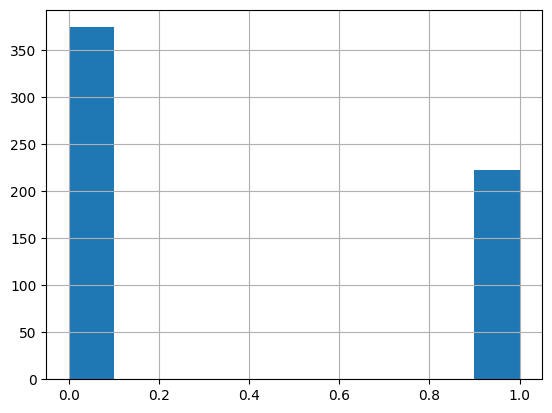

In [125]:
y_train.hist()

<Axes: >

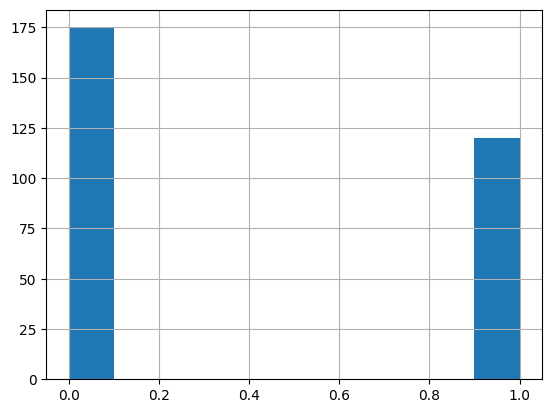

In [126]:
y_test.hist()

In [109]:
params = {'loss':['log_loss', 'exponential'], 'learning_rate':[0.01, 0.5], 'min_samples_split':[2,10],'min_samples_leaf':[1,10],
          'max_depth':[1,10], 'min_impurity_decrease':[0.0,10]}
gb = GradientBoostingClassifier(random_state = 42)
gb = GridSearchCV(gb,params)
gb.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.5],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [1, 10],
                         'min_impurity_decrease': [0.0, 10],
                         'min_samples_leaf': [1, 10],
                         'min_samples_split': [2, 10]})

In [110]:
y_pred = gb.predict(X_test)
accuracy_score(y_pred,y_test)

0.8338983050847457

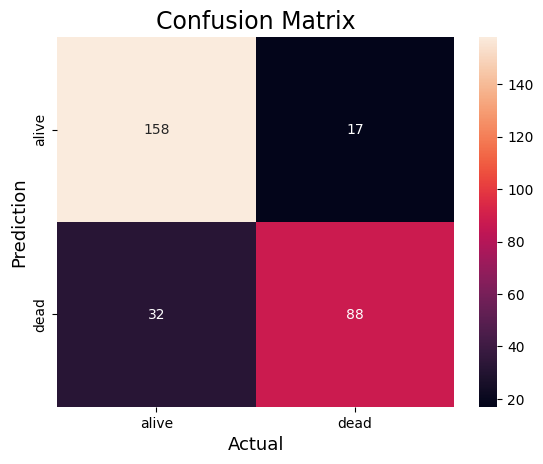

In [111]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
			annot=True,
			fmt='g',
			xticklabels=['alive','dead'],
			yticklabels=['alive','dead'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [113]:
df_result = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/titanic_test.csv')
id = df_result['PassengerId']
df_result

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [114]:
df_result = df_result.drop(['PassengerId','Name','Cabin'],axis=1)
df_result['Age'] = df_result['Age'].fillna(np.float64(int(df_result['Age'].mean())))
df_result['Fare'] = df_result['Fare'].fillna(np.float64(int(df_result['Fare'].mean())))

df_result['Sex'] = le.fit_transform(df_result['Sex'])
df_result['Ticket'] = le.fit_transform(df_result['Ticket'])
df_result['Embarked'] = le.fit_transform(df_result['Embarked'])

In [115]:
df_result

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,34.5,0,0,152,7.8292,1
1,3,0,47.0,1,0,221,7.0000,2
2,2,1,62.0,0,0,73,9.6875,1
3,3,1,27.0,0,0,147,8.6625,2
4,3,0,22.0,1,1,138,12.2875,2
...,...,...,...,...,...,...,...,...
413,3,1,30.0,0,0,267,8.0500,2
414,1,0,39.0,0,0,324,108.9000,0
415,3,1,38.5,0,0,346,7.2500,2
416,3,1,30.0,0,0,220,8.0500,2


In [116]:
result = gb.predict(df_result)
pd.DataFrame({'PassengerId':id,'Survived':result}).to_csv('result.csv',index=False)

In [117]:
test = pd.read_csv('/content/result.csv')
test

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
